In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
permits = pd.read_csv("/Users/satvikbisht/Documents/Polimi/Semester 3/Data Quality /Project/diq/data/raw/building_permits.csv")
permits

/var/folders/t8/c3gz51w107s3mw7rbv_100lr0000gn/T/ipykernel_26513/3802291889.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv("/Users/satvikbisht/Documents/Polimi/Semester 3/Data Quality /Project/diq/data/raw/building_permits.csv")


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [6]:
print(permits["Description"].unique())
print(f'Len: {len(permits["Description"].unique())}')


['ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.'
 'remove (e) awning and associated signs.'
 'installation of separating wall' ...
 'apt m2ph-1e: remove & replace kitchen adn bathroom counters tops, sinks, p-traps to be replaced, exh fan at same location. light shall be h.e. remove and replace (e) switches and outlets. no change on walls or layout.'
 'bathtub & shower tile replacement.'
 'fire alarm upgrade ref 201704123852']
Len: 134273


In [7]:
#Distribution of values: Check if some descriptions appear frequently, indicating natural categories.
permits["Description"].value_counts().head(40)

Description
street space                                                                                                                                                                                                                                                                                                 22163
reroofing                                                                                                                                                                                                                                                                                                     9465
street space permit                                                                                                                                                                                                                                                                                           7549
re-roofing                                                         

In [12]:
permits.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID', 'trans

# DESCRIPTION FINAL

Loading Dataset...


/var/folders/t8/c3gz51w107s3mw7rbv_100lr0000gn/T/ipykernel_36727/2259481612.py:107: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Preprocessing...
Applying Cleaning Functions...
Unique descriptions: 198900
Vectorizing Text...
Clustering Texts...
Silhouette Score: 0.28838356218172423
Davies-Bouldin Index: 3.456098978090757 (Lower is Better)
Calinski-Harabasz Index: 1072.2408178916276 (Higher is Better)
Mapping Clusters Back to Original Data...
Reducing Dimensionality for Visualization...
Visualizing Clusters...


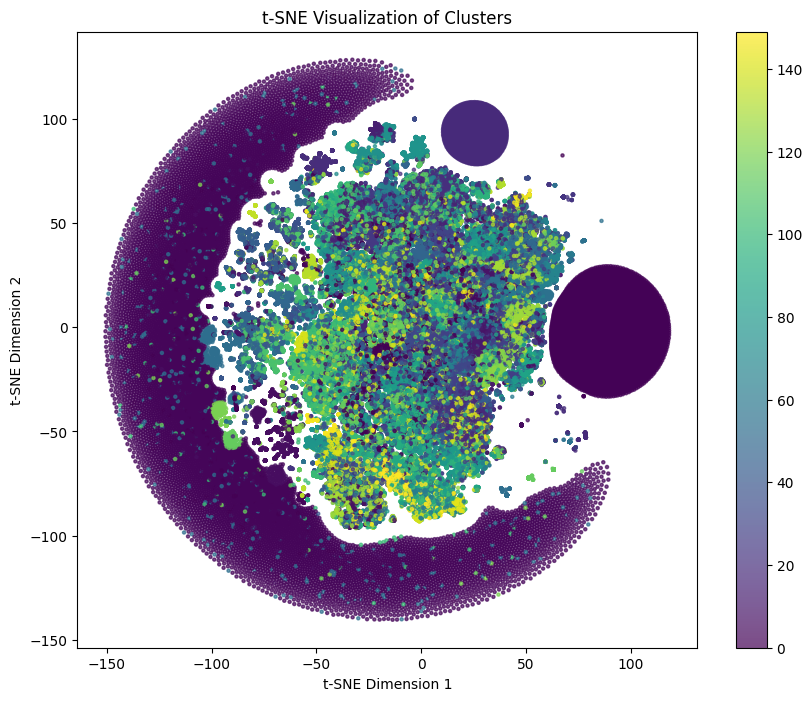

Saving Results...
Results saved to clustered_texts_with_mapping.csv
Processing Complete!


In [8]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords

# Step 1: Define Replacement Dictionary
replacement_dict = {
    "streeet space": "street space",
    "streetspace": "street space",
    "street space.": "street space",
    "reroof": "re-roof",
    "reroofing.": "re-roof",
    "re-roofing": "re-roof"
}

# Step 2: Text Cleaning and Normalization
def clean_description(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                     # Convert to lowercase
    text = re.sub(r'\d+', '', text)         # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)     # Remove punctuation
    text = re.sub(r'\s+', ' ', text)        # Replace multiple spaces with a single space
    return text.strip()                     # Strip leading/trailing spaces

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    return " ".join(word for word in words if word not in stop_words)

def apply_replacement(text, replacement_dict):
    for old_term, new_term in replacement_dict.items():
        text = text.replace(old_term, new_term)
    return text

# Step 3: Apply Replacement Dictionary 
def preprocess(data, column, replacement_dict):
    print("Applying Cleaning Functions...")
    data["Cleaned_Description"] = data[column].apply(clean_description)
    data["Cleaned_Description"] = data["Cleaned_Description"].apply(remove_stopwords)
    data["Transformed_Description"] = data["Cleaned_Description"].apply(
        lambda x: apply_replacement(x, replacement_dict)
    )
    descriptions = data["Transformed_Description"]
    print(f"Unique descriptions: {len(descriptions)}")
    return data, descriptions

# Step 4: Vectorize Text with TF-IDF
def vectorize_text(data, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(data)
    return vectorizer, tfidf_matrix

# Step 5: Clustering with KMeans
def cluster_texts(matrix, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(matrix)
    
    # Evaluation Metrics using Euclidean distance
    silhouette_avg = silhouette_score(matrix, labels)
    db_index = davies_bouldin_score(matrix.toarray(), labels)
    ch_index = calinski_harabasz_score(matrix.toarray(), labels)
    
    print(f"Silhouette Score: {silhouette_avg}")
    #print(f"Davies-Bouldin Index: {db_index} (Lower is Better)")
    #print(f"Calinski-Harabasz Index: {ch_index} (Higher is Better)")
    return labels, kmeans

# Step 6: Map Clusters Back to Original Data
def map_clusters_back(data, unique_descriptions, labels):
    cluster_mapping = dict(zip(unique_descriptions, labels))
    data["Cluster"] = data["Transformed_Description"].map(cluster_mapping)
    return data


# Step 7: Visualize Clusters
def visualize_clusters(tsne_embeddings, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap="viridis", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Step 8: Dimensionality Reduction with PCA and t-SNE
def reduce_dimensionality(matrix, random_state=42):
    pca = PCA(n_components=50, random_state=random_state)
    pca_result = pca.fit_transform(matrix.toarray())

    tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, init="random")
    tsne_result = tsne.fit_transform(pca_result)

    return tsne_result

# Step 9: Main Pipeline
def main_pipeline(file_path, column, n_clusters, max_features=1000, shuffle=True):
    print("Loading Dataset...")
    df = pd.read_csv(file_path)

    # Shuffle Dataset
    if shuffle:
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("Preprocessing...")
    df ,descriptions= preprocess(df, column, replacement_dict)

    print("Vectorizing Text...")
    vectorizer, tfidf_matrix = vectorize_text(descriptions, max_features=max_features)

    print("Clustering Texts...")
    labels, kmeans = cluster_texts(tfidf_matrix, n_clusters=n_clusters)

    print("Mapping Clusters Back to Original Data...")
    df = map_clusters_back(df, descriptions, labels)

    print("Reducing Dimensionality for Visualization...")
    tsne_embeddings = reduce_dimensionality(tfidf_matrix)

    print("Visualizing Clusters...")
    visualize_clusters(tsne_embeddings, labels)

    print("Saving Results...")
    output_file = "clustered_texts_with_mapping.csv"
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")
    return df

# Run the Pipeline
if __name__ == "__main__":
    file_path = "/Users/satvikbisht/Documents/Polimi/Semester 3/Data Quality /Project/diq/data/raw/building_permits.csv"  # Update with your file path
    column = "Description"  # Update with your column name
    n_clusters = 150  # Set the number of clusters
    max_features = 1000  # Adjust based on data size
    result_df = main_pipeline(file_path, column, n_clusters=n_clusters, max_features=max_features, shuffle=True)
    print("Processing Complete!")

# DESCRIPTION WITHOUT TSNE VISUALIZATION

In [9]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords

# Step 1: Define Replacement Dictionary
replacement_dict = {
    "streeet space": "street space",
    "streetspace": "street space",
    "street space.": "street space",
    "reroof": "re-roof",
    "reroofing.": "re-roof",
    "re-roofing": "re-roof"
}

# Step 2: Text Cleaning and Normalization
def clean_description(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                     # Convert to lowercase
    text = re.sub(r'\d+', '', text)         # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)     # Remove punctuation
    text = re.sub(r'\s+', ' ', text)        # Replace multiple spaces with a single space
    return text.strip()                     # Strip leading/trailing spaces

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    return " ".join(word for word in words if word not in stop_words)

def apply_replacement(text, replacement_dict):
    for old_term, new_term in replacement_dict.items():
        text = text.replace(old_term, new_term)
    return text

# Step 3: Apply Replacement Dictionary 
def preprocess(data, column, replacement_dict):
    print("Applying Cleaning Functions...")
    data["Cleaned_Description"] = data[column].apply(clean_description)
    data["Cleaned_Description"] = data["Cleaned_Description"].apply(remove_stopwords)
    data["Transformed_Description"] = data["Cleaned_Description"].apply(
        lambda x: apply_replacement(x, replacement_dict)
    )
    descriptions = data["Transformed_Description"]
    print(f"Unique descriptions: {len(descriptions)}")
    return data, descriptions

# Step 4: Vectorize Text with TF-IDF
def vectorize_text(data, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(data)
    return vectorizer, tfidf_matrix

# Step 5: Clustering with KMeans
def cluster_texts(matrix, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(matrix)
    
    # Evaluation Metrics using Euclidean distance
    silhouette_avg = silhouette_score(matrix, labels)
    db_index = davies_bouldin_score(matrix.toarray(), labels)
    ch_index = calinski_harabasz_score(matrix.toarray(), labels)
    
    print(f"Silhouette Score: {silhouette_avg}")
    #print(f"Davies-Bouldin Index: {db_index} (Lower is Better)")
    #print(f"Calinski-Harabasz Index: {ch_index} (Higher is Better)")
    return labels, kmeans

# Step 6: Map Clusters Back to Original Data
def map_clusters_back(data, unique_descriptions, labels):
    cluster_mapping = dict(zip(unique_descriptions, labels))
    data["Cluster"] = data["Transformed_Description"].map(cluster_mapping)
    return data


# Step 7: Visualize Clusters
def visualize_clusters(tsne_embeddings, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap="viridis", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Step 8: Dimensionality Reduction with PCA and t-SNE
def reduce_dimensionality(matrix, random_state=42):
    pca = PCA(n_components=50, random_state=random_state)
    pca_result = pca.fit_transform(matrix.toarray())

    tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, init="random")
    tsne_result = tsne.fit_transform(pca_result)

    return tsne_result

# Step 9: Main Pipeline
def main_pipeline(file_path, column, n_clusters, max_features=1000, shuffle=True):
    print("Loading Dataset...")
    df = pd.read_csv(file_path)

    # Shuffle Dataset
    if shuffle:
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("Preprocessing...")
    df ,descriptions= preprocess(df, column, replacement_dict)

    print("Vectorizing Text...")
    vectorizer, tfidf_matrix = vectorize_text(descriptions, max_features=max_features)

    print("Clustering Texts...")
    labels, kmeans = cluster_texts(tfidf_matrix, n_clusters=n_clusters)

    print("Mapping Clusters Back to Original Data...")
    df = map_clusters_back(df, descriptions, labels)

    #print("Reducing Dimensionality for Visualization...")
    #tsne_embeddings = reduce_dimensionality(tfidf_matrix)

    #print("Visualizing Clusters...")
    #visualize_clusters(tsne_embeddings, labels)

    print("Saving Results...")
    output_file = "clustered_texts_with_mapping.csv"
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")
    return df

# Run the Pipeline
if __name__ == "__main__":
    file_path = "/Users/satvikbisht/Documents/Polimi/Semester 3/Data Quality /Project/diq/data/raw/building_permits.csv"  # Update with your file path
    column = "Description"  # Update with your column name
    n_clusters = 150  # Set the number of clusters
    max_features = 1000  # Adjust based on data size
    result_df = main_pipeline(file_path, column, n_clusters=n_clusters, max_features=max_features, shuffle=True)
    print("Processing Complete!")

Loading Dataset...


/var/folders/t8/c3gz51w107s3mw7rbv_100lr0000gn/T/ipykernel_36727/3495017137.py:107: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Preprocessing...
Applying Cleaning Functions...
Unique descriptions: 198900
Vectorizing Text...
Clustering Texts...
Silhouette Score: 0.28838356218172423
Mapping Clusters Back to Original Data...
Saving Results...
Results saved to clustered_texts_with_mapping.csv
Processing Complete!


In [10]:
for cluster in result_df["Cluster"].unique():
    print(f"Cluster {cluster}:")
    print(result_df[result_df["Cluster"] == cluster]["Transformed_Description"].head(100))

Cluster 0:
0                    open walls kitchen bedroom per plans
37      electrical hvac work associated mech work incl...
116     install grab bars public hallway bathrooms flo...
128     plaza levelpatch repair paving water proofing ...
147     basement remove e threaded piping provides fue...
                              ...                        
3176    replace current front entry driveway wide walk...
3249    modifications permit mechanical plumbing desig...
3260       verify installed direct vent montage fireplace
3268    replacing cabinetry installing six new lights ...
3303                                                     
Name: Transformed_Description, Length: 100, dtype: object
Cluster 2:
1       re-roof
4       re-roof
12      re-roof
36      re-roof
46      re-roof
         ...   
1389    re-roof
1401    re-roof
1405    re-roof
1417    re-roof
1443    re-roof
Name: Transformed_Description, Length: 100, dtype: object
Cluster 48:
2        garage modification garage 

# Existing USE

Loading Dataset...


/var/folders/t8/c3gz51w107s3mw7rbv_100lr0000gn/T/ipykernel_36727/3484825519.py:102: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Preprocessing...
Applying Cleaning Functions...
Existing Use: 198900
Vectorizing Text...
Clustering Texts...
Silhouette Score: 0.9962124474761643
Davies-Bouldin Index: 0.28053789665335693 (Lower is Better)
Calinski-Harabasz Index: 1173127.8385824547 (Higher is Better)
Mapping Clusters Back to Original Data...
Reducing Dimensionality for Visualization...
Visualizing Clusters...


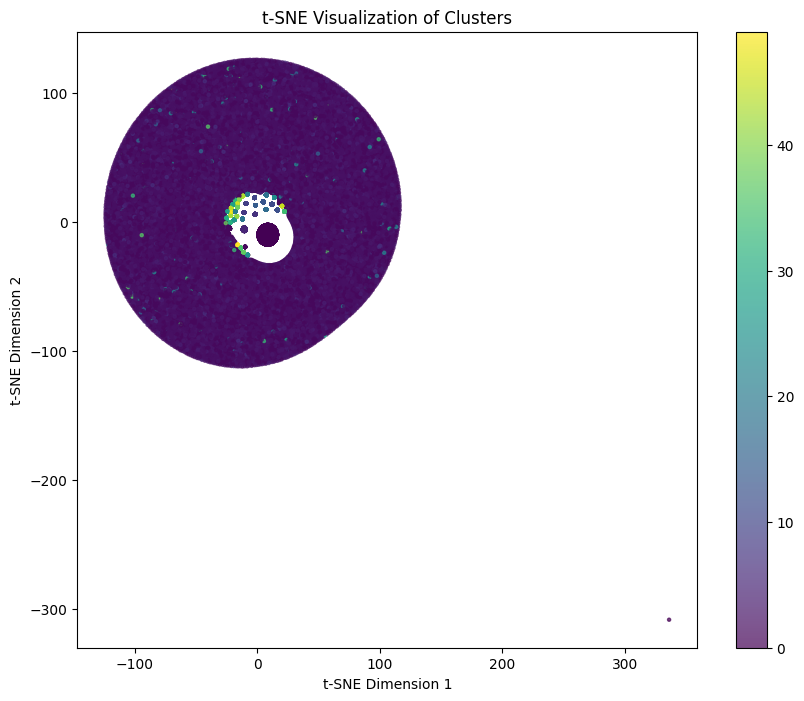

Saving Results...
Results saved to clustered_texts_with_mapping_existing_use.csv
Processing Complete!


In [4]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords

# Step 1: Define Replacement Dictionary
replacement_dict = {
 
}

# Step 2: Text Cleaning and Normalization
def clean_Existing_Use(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                     # Convert to lowercase
    text = re.sub(r'\d+', '', text)         # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)     # Remove punctuation
    text = re.sub(r'\s+', ' ', text)        # Replace multiple spaces with a single space
    return text.strip()                     # Strip leading/trailing spaces

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    return " ".join(word for word in words if word not in stop_words)

def apply_replacement(text, replacement_dict):
    for old_term, new_term in replacement_dict.items():
        text = text.replace(old_term, new_term)
    return text

# Step 3: Apply Replacement Dictionary 
def preprocess(data, column, replacement_dict):
    print("Applying Cleaning Functions...")
    data["Cleaned_Existing_Use"] = data[column].apply(clean_Existing_Use)
    data["Cleaned_Existing_Use"] = data["Cleaned_Existing_Use"].apply(remove_stopwords)
    data["Transformed_Existing_Use"] = data["Cleaned_Existing_Use"].apply(
        lambda x: apply_replacement(x, replacement_dict)
    )
    existing_use = data["Transformed_Existing_Use"]
    print(f"Existing Use: {len(existing_use)}")
    return data, existing_use

# Step 4: Vectorize Text with TF-IDF
def vectorize_text(data, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(data)
    return vectorizer, tfidf_matrix

# Step 5: Clustering with KMeans
def cluster_texts(matrix, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(matrix)
    
    # Evaluation Metrics using Euclidean distance
    silhouette_avg = silhouette_score(matrix, labels)
    db_index = davies_bouldin_score(matrix.toarray(), labels)
    ch_index = calinski_harabasz_score(matrix.toarray(), labels)
    
    print(f"Silhouette Score: {silhouette_avg}")
    #print(f"Davies-Bouldin Index: {db_index} (Lower is Better)")
    #print(f"Calinski-Harabasz Index: {ch_index} (Higher is Better)")
    return labels, kmeans

# Step 6: Map Clusters Back to Original Data
def map_clusters_back(data, existing_use, labels):
    cluster_mapping = dict(zip(existing_use, labels))
    data["Cluster_Existing_use"] = data["Transformed_Existing_Use"].map(cluster_mapping)
    return data


# Step 7: Visualize Clusters
def visualize_clusters(tsne_embeddings, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap="viridis", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Step 8: Dimensionality Reduction with PCA and t-SNE
def reduce_dimensionality(matrix, random_state=42):
    pca = PCA(n_components=50, random_state=random_state)
    pca_result = pca.fit_transform(matrix.toarray())

    tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, init="random")
    tsne_result = tsne.fit_transform(pca_result)

    return tsne_result

# Step 9: Main Pipeline
def main_pipeline(file_path, column, n_clusters, max_features=1000, shuffle=True):
    print("Loading Dataset...")
    df = pd.read_csv(file_path)

    # Shuffle Dataset
    if shuffle:
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("Preprocessing...")
    df ,existing_use= preprocess(df, column, replacement_dict)

    print("Vectorizing Text...")
    vectorizer, tfidf_matrix = vectorize_text(existing_use, max_features=max_features)

    print("Clustering Texts...")
    labels, kmeans = cluster_texts(tfidf_matrix, n_clusters=n_clusters)

    print("Mapping Clusters Back to Original Data...")
    df = map_clusters_back(df, existing_use, labels)

    #print("Reducing Dimensionality for Visualization...")
    tsne_embeddings = reduce_dimensionality(tfidf_matrix)

    #print("Visualizing Clusters...")
    visualize_clusters(tsne_embeddings, labels)

    print("Saving Results...")
    output_file = "clustered_texts_with_mapping_existing_use.csv"
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")
    return df

# Run the Pipeline
if __name__ == "__main__":
    file_path = "/Users/satvikbisht/Documents/Polimi/Semester 3/Data Quality /Project/diq/data/raw/building_permits.csv"  # Update with your file path
    column = "Existing Use"  # Update with your column name
    n_clusters = 50  # Set the number of clusters
    max_features = 1000  # Adjust based on data size
    result_df = main_pipeline(file_path, column, n_clusters=n_clusters, max_features=max_features, shuffle=True)
    print("Processing Complete!")

In [7]:
for cluster in result_df["Cluster_Existing_use"].unique():
    print(f"Cluster {cluster}:")
    print(result_df[result_df["Cluster_Existing_use"] == cluster]["Transformed_Existing_Use"].head(100))

Cluster 2:
0      family dwelling
4      family dwelling
5      family dwelling
11     family dwelling
12     family dwelling
            ...       
287    family dwelling
289    family dwelling
291    family dwelling
293    family dwelling
297    family dwelling
Name: Transformed_Existing_Use, Length: 100, dtype: object
Cluster 0:
1      apartments
6      apartments
27     apartments
28     apartments
45     apartments
          ...    
479    apartments
486    apartments
502    apartments
519    apartments
523    apartments
Name: Transformed_Existing_Use, Length: 100, dtype: object
Cluster 3:
2      office
10     office
14     office
22     office
26     office
        ...  
677    office
678    office
690    office
702    office
738    office
Name: Transformed_Existing_Use, Length: 100, dtype: object
Cluster 9:
3        warehouseno frnitur
700      warehouseno frnitur
858      warehouseno frnitur
887      warehouseno frnitur
939      warehouseno frnitur
                ...         
